In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pickle
import pandas as pd



In [2]:
if tf.test.is_gpu_available():
    print('GPU is available')
else:
    print('GPU is NOT available')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [3]:
def remove_outliers_and_interpolate(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(x - mean) / std for x in data]
    filtered_data = [x if abs(z) < threshold else 0 for x, z in zip(data, z_scores)]
    return np.interp(np.arange(len(filtered_data)), np.flatnonzero(filtered_data), np.array(filtered_data)[np.flatnonzero(filtered_data)])

[5.38424063 5.40454245 5.59618568 ... 1.64781845 1.62875116 1.61578417]


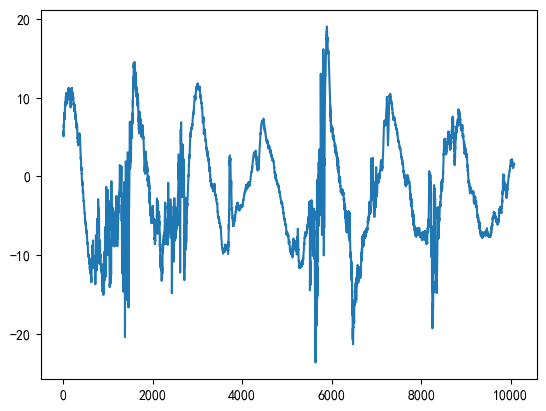

In [53]:
# 读取Excel文件
df = pd.read_excel('空间天气预报练习与作业/磁场数据7天.xls')
train=np.array(df["Hn"])

train=remove_outliers_and_interpolate(train)
# 打印前5行数据
print(train)
# plt.plot(np.arange(10079),train)
plt.plot(np.arange(10079),train)

In [49]:
train=train.reshape(-1,1)
max_values = np.max(train, axis=0)
min_values = np.min(train, axis=0)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
train = min_max_scaler.fit_transform(train)
with open("min_max_scaler.pkl", "wb") as f:
    pickle.dump(min_max_scaler, f)
print(train.shape)
print(max_values,min_values)

(10079, 1)
[19.04428864] [-23.61950874]


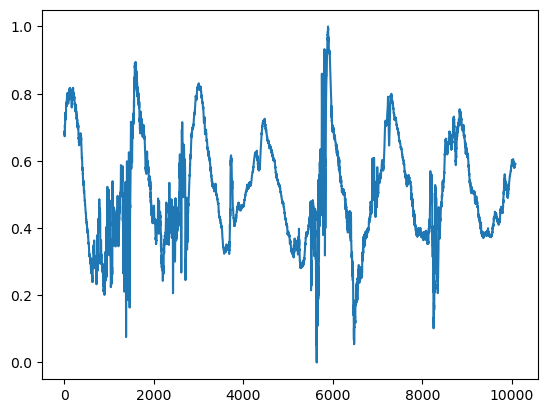

In [6]:
 
plt.plot(np.arange(10079),train[:,0])


In [7]:
# Create a LSTM neural network
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=100, activation='relu', input_shape=(100, 1)))

#model.add(LSTM(units=100, activation='relu'))

# Add output layer
model.add(Dense(units=10))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
Total params: 41,810
Trainable params: 41,810
Non-trainable params: 0
_________________________________________________________________


In [8]:
ccc=10079-100-10+1
new_X_train = np.zeros((ccc, 100, 1))
new_Y_train = np.zeros((ccc, 10))
for i in range(ccc):
    new_X_train[i] = train[i:i+100]

for i in range(ccc):
    new_Y_train[i] = train[100+i:100+i+10,0]




Epoch 1/100
71/71 [==============================] - 7s 82ms/step - loss: 2213766656.0000
Epoch 2/100
71/71 [==============================] - 6s 80ms/step - loss: 0.1765
Epoch 3/100
71/71 [==============================] - 6s 81ms/step - loss: 0.1690
Epoch 4/100
71/71 [==============================] - 6s 81ms/step - loss: 1.1600
Epoch 5/100
71/71 [==============================] - 6s 81ms/step - loss: 7805293.0000
Epoch 6/100
71/71 [==============================] - 6s 81ms/step - loss: 0.1018
Epoch 7/100
71/71 [==============================] - 6s 81ms/step - loss: 0.0303
Epoch 8/100
71/71 [==============================] - 6s 80ms/step - loss: 0.0121
Epoch 9/100
71/71 [==============================] - 6s 81ms/step - loss: 0.0075
Epoch 10/100
71/71 [==============================] - 6s 81ms/step - loss: 0.0051
Epoch 11/100
71/71 [==============================] - 6s 80ms/step - loss: 0.0040
Epoch 12/100
71/71 [==============================] - 6s 80ms/step - loss: 0.0036
Epoch 13/1

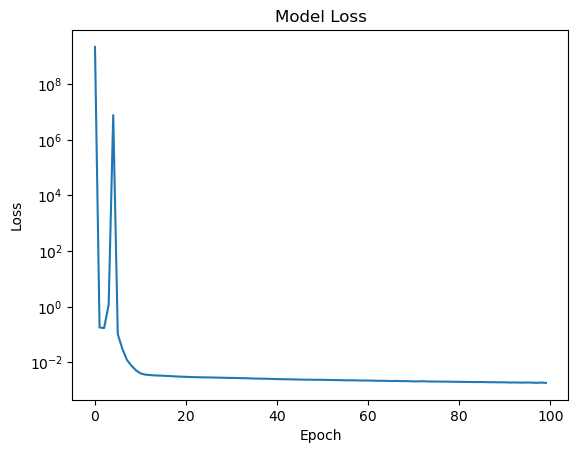

In [9]:
model.fit(new_X_train[0:9000], new_Y_train[0:9000], epochs=100, batch_size=128)
 
plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale("log")
plt.show()



[[0.78596795 0.7890115  0.79365885 ... 0.79107594 0.7858266  0.78168285]
 [0.78593606 0.788811   0.79338354 ... 0.7912313  0.78570014 0.78193194]
 [0.78625095 0.789863   0.7938991  ... 0.7925771  0.7870081  0.7831991 ]
 ...
 [0.513389   0.52132714 0.5166272  ... 0.5131413  0.5184227  0.5149089 ]
 [0.51610065 0.5247937  0.52060634 ... 0.5158358  0.52195704 0.5179743 ]
 [0.51820207 0.52705157 0.5234815  ... 0.51718956 0.5243328  0.52017444]] [[0.78538817 0.79658793 0.8008154  ... 0.80399705 0.80422923 0.80187852]
 [0.79658793 0.8008154  0.79617862 ... 0.80422923 0.80187852 0.80360944]
 [0.8008154  0.79617862 0.80551523 ... 0.80187852 0.80360944 0.79943987]
 ...
 [0.51752009 0.52129628 0.52030509 ... 0.50734921 0.50542162 0.50439119]
 [0.52129628 0.52030509 0.51601682 ... 0.50542162 0.50439119 0.50362365]
 [0.52030509 0.51601682 0.51252087 ... 0.50439119 0.50362365 0.5051171 ]]


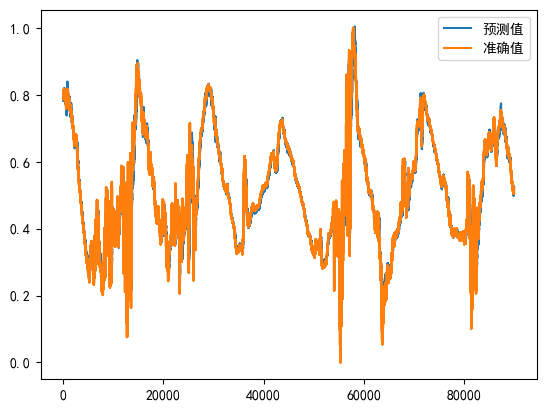

In [14]:
outputs = model(new_X_train[0:9000])
yy=new_Y_train[0:9000]
outputs=np.array(outputs)
print(outputs,yy)

plt.plot(np.arange(90000),outputs.reshape(-1),label='预测值')
plt.plot(np.arange(90000),yy.reshape(-1),label='准确值')
 
plt.legend()

 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


[[0.5194968  0.5275986  0.5249839  ... 0.5173711  0.52528936 0.5211504 ]
 [0.5193721  0.5262649  0.52443826 ... 0.5161788  0.52453786 0.5204984 ]
 [0.5183664  0.52374035 0.522725   ... 0.5140839  0.5225303  0.51886046]
 ...
 [0.58014214 0.5845675  0.58360314 ... 0.57824165 0.58032584 0.58074695]
 [0.5805596  0.585042   0.5841946  ... 0.5786743  0.580825   0.5811751 ]
 [0.5810618  0.58561796 0.58488697 ... 0.57901734 0.58141243 0.5816877 ]] [[0.51601682 0.51252087 0.51408142 ... 0.50362365 0.5051171  0.50844245]
 [0.51252087 0.51408142 0.51010279 ... 0.5051171  0.50844245 0.50713989]
 [0.51408142 0.51010279 0.50734921 ... 0.50844245 0.50713989 0.50574585]
 ...
 [0.5856202  0.58582393 0.58655278 ... 0.59266028 0.59183877 0.59224281]
 [0.58582393 0.58655278 0.58682123 ... 0.59183877 0.59224281 0.59179589]
 [0.58655278 0.58682123 0.58775221 ... 0.59224281 0.59179589 0.59149195]]


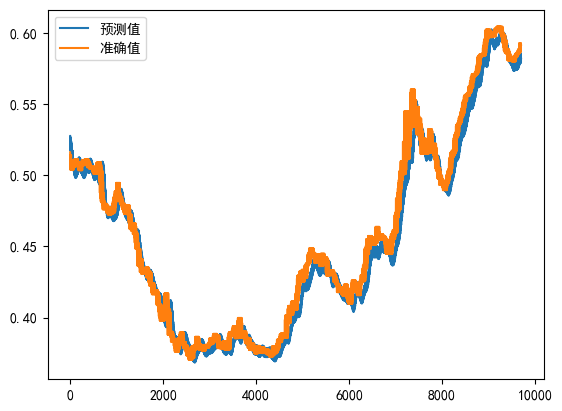

In [16]:
outputs = model(new_X_train[9000:9970])
yy=new_Y_train[9000:9970]
outputs=np.array(outputs)
print(outputs,yy)

plt.plot(np.arange(9700),outputs.reshape(-1),label='预测值')
plt.plot(np.arange(9700),yy.reshape(-1),label='准确值')
 
plt.legend()

 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号




In [30]:
Y_=[]
train2=train.reshape(-1)
for i in np.arange(144):
    X_=train2[-100:].copy()
    X_=X_.reshape(1,-1,1)
    outputs = model(X_)
    outputs=np.array(outputs).reshape(-1)
    train2=np.concatenate((train2,outputs),axis=0)
    print(train2.shape)
    Y_=np.concatenate((Y_,outputs),axis=0)







(10089,)
(10099,)
(10109,)
(10119,)
(10129,)
(10139,)
(10149,)
(10159,)
(10169,)
(10179,)
(10189,)
(10199,)
(10209,)
(10219,)
(10229,)
(10239,)
(10249,)
(10259,)
(10269,)
(10279,)
(10289,)
(10299,)
(10309,)
(10319,)
(10329,)
(10339,)
(10349,)
(10359,)
(10369,)
(10379,)
(10389,)
(10399,)
(10409,)
(10419,)
(10429,)
(10439,)
(10449,)
(10459,)
(10469,)
(10479,)
(10489,)
(10499,)
(10509,)
(10519,)
(10529,)
(10539,)
(10549,)
(10559,)
(10569,)
(10579,)
(10589,)
(10599,)
(10609,)
(10619,)
(10629,)
(10639,)
(10649,)
(10659,)
(10669,)
(10679,)
(10689,)
(10699,)
(10709,)
(10719,)
(10729,)
(10739,)
(10749,)
(10759,)
(10769,)
(10779,)
(10789,)
(10799,)
(10809,)
(10819,)
(10829,)
(10839,)
(10849,)
(10859,)
(10869,)
(10879,)
(10889,)
(10899,)
(10909,)
(10919,)
(10929,)
(10939,)
(10949,)
(10959,)
(10969,)
(10979,)
(10989,)
(10999,)
(11009,)
(11019,)
(11029,)
(11039,)
(11049,)
(11059,)
(11069,)
(11079,)
(11089,)
(11099,)
(11109,)
(11119,)
(11129,)
(11139,)
(11149,)
(11159,)
(11169,)
(11179,)
(11189,)
(

In [32]:
print(Y_.shape)

(1440,)


In [50]:

Y_2=Y_*(max_values - min_values) + min_values
print(max_values)

[19.04428864]


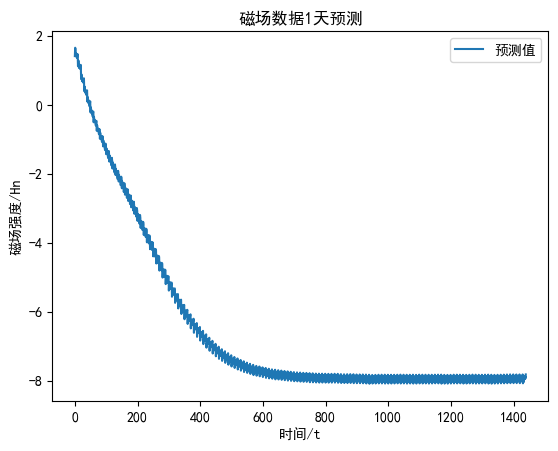

In [52]:
plt.plot(np.arange(1440),Y_2,label='预测值')

# 添加横纵标题
plt.title('磁场数据1天预测')
plt.xlabel('时间/t')
plt.ylabel('磁场强度/Hn')
 
plt.legend()

 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
